In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import visualization as vis
import utilities as utils
import os

In [2]:
def imshow(image):
    
    # Display the image in the notebook
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()

erge

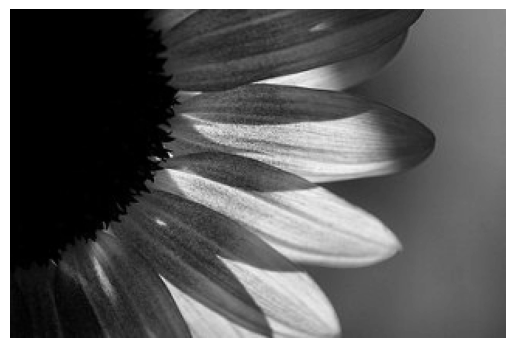

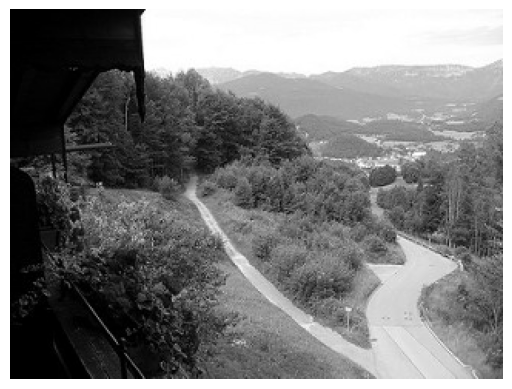

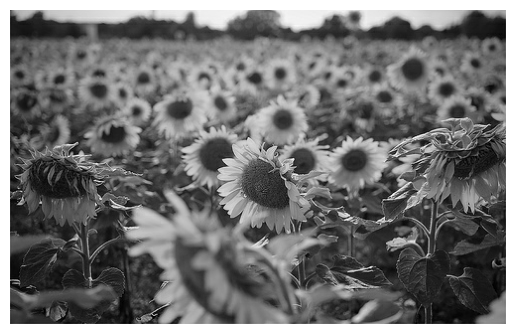

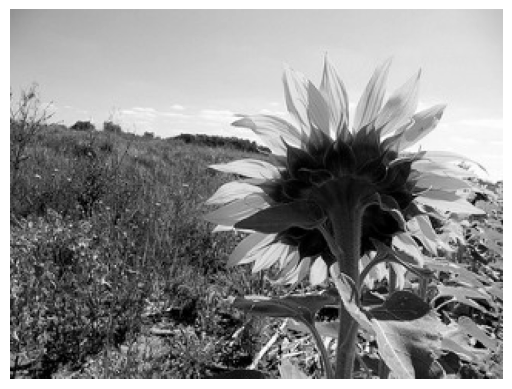

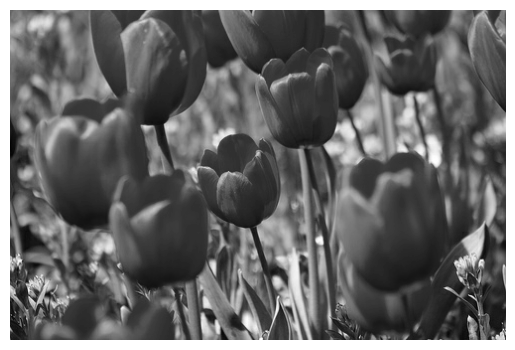

In [3]:
list_of_images = []
PATH = 'images'
images_dir = os. listdir(PATH)

# Iterate over images
for images in images_dir:  # Taking first 10 images for example
    image = cv2.imread(os.path.join(PATH, images), cv2.IMREAD_GRAYSCALE)
    # Convert from RGB to Grayscale using OpenCV
    list_of_images.append(image)
    
    imshow(image)


In [4]:
dataframes = []

for image in list_of_images:
    df = utils.create_dataframe_image(image)
    dataframes.append(df)

# ex = dataframes[4].loc['Salt_and_Pepper_prob_0.05', 'Image']
# Display the image in the notebook
# imshow(ex)



In [5]:
dataframes[0].index

Index(['no_noise', 'Gaussian Noise (low)', 'Gaussian Noise (medium)',
       'Gaussian Noise (high)', 'Salt and Pepper (low)',
       'Salt and Pepper (medium)', 'Salt and Pepper (high)'],
      dtype='object', name='Noise_Type')

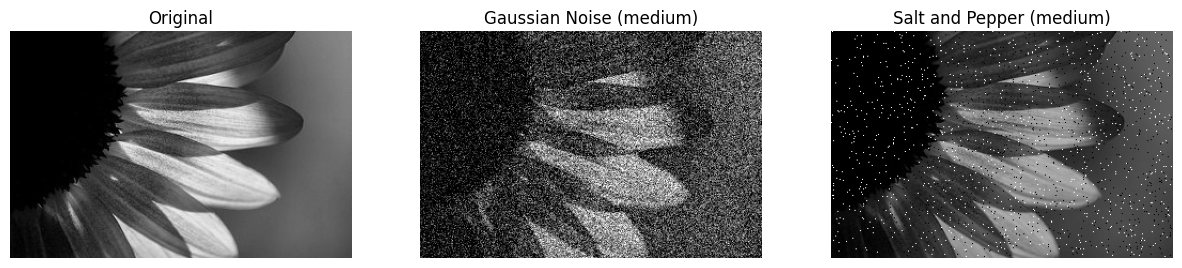

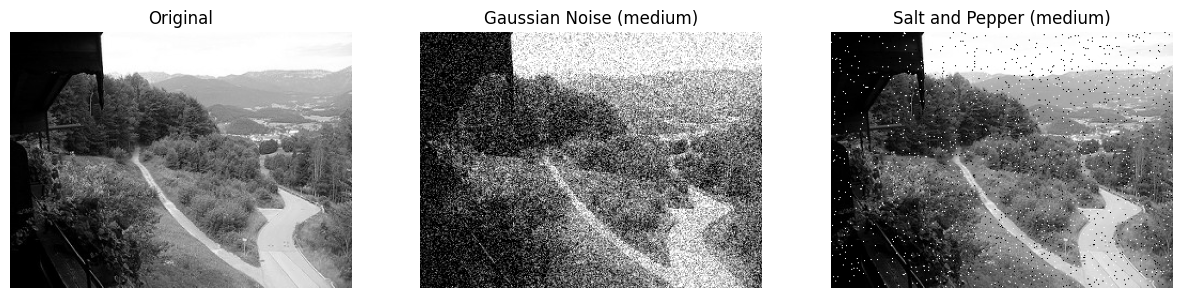

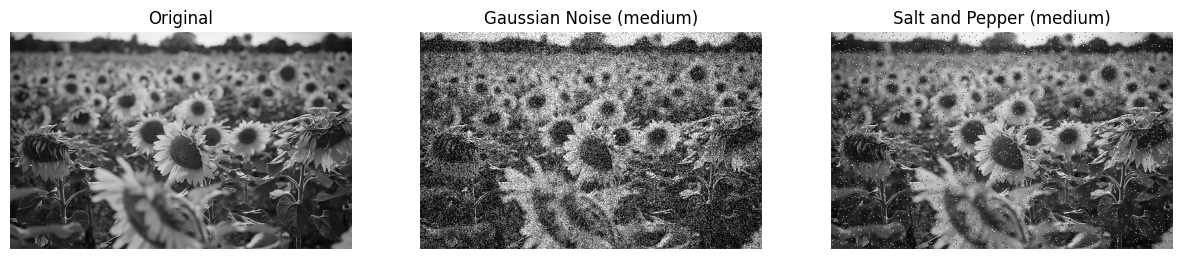

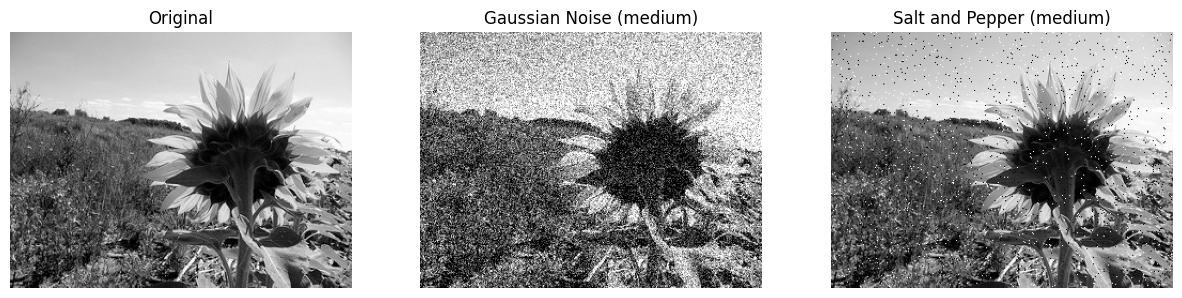

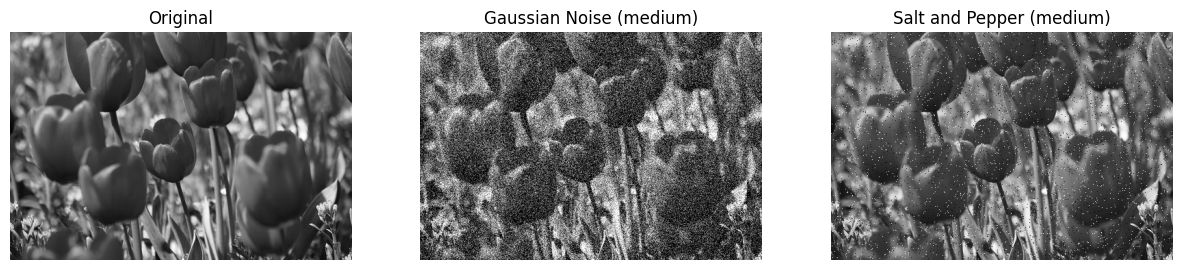

In [6]:
# Define the noise types to display

noise_types = ['Gaussian Noise (medium)', 'Salt and Pepper (medium)']

# Iterate over all images
for i, image in enumerate(list_of_images):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Display the original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    # Display the noisy variants
    for j, noise_type in enumerate(noise_types):
        noisy_image = dataframes[i].loc[noise_type, 'Image']
        axes[j + 1].imshow(noisy_image, cmap='gray')
        axes[j + 1].set_title(noise_type)
        axes[j + 1].axis('off')
    
    plt.show()

In [ ]:
# Define the filters
def apply_filters(image, kernel_size=(3, 3)):
    
    # Box filter
    box_filtered = cv2.boxFilter(image, -1, kernel_size)
    
    # Median filter
    median_filtered = cv2.medianBlur(image, 3)
    
    # Gaussian filter
    gaussian_filtered = cv2.GaussianBlur(image, kernel_size, 0)
    
    return box_filtered, median_filtered, gaussian_filtered, mean_filtered

# Apply the filters to the images in the dataframe
filtered_images = {}

for noise_type, row in df.iterrows():
    image = row['Image']
    box_filtered, median_filtered, gaussian_filtered, mean_filtered = apply_filters(image)
    
    filtered_images[noise_type] = {
        'box_filtered': box_filtered,
        'median_filtered': median_filtered,
        'gaussian_filtered': gaussian_filtered,
        'mean_filtered': mean_filtered
    }

# Display the filtered images for a specific noise type
noise_type = 'Gaussian_Noise_sigma_75'
for filter_type, filtered_image in filtered_images[noise_type].items():
    print(f"{filter_type} for {noise_type}")
    imshow(filtered_image)

KeyError: 'Gaussian_Noise_sigma_75'

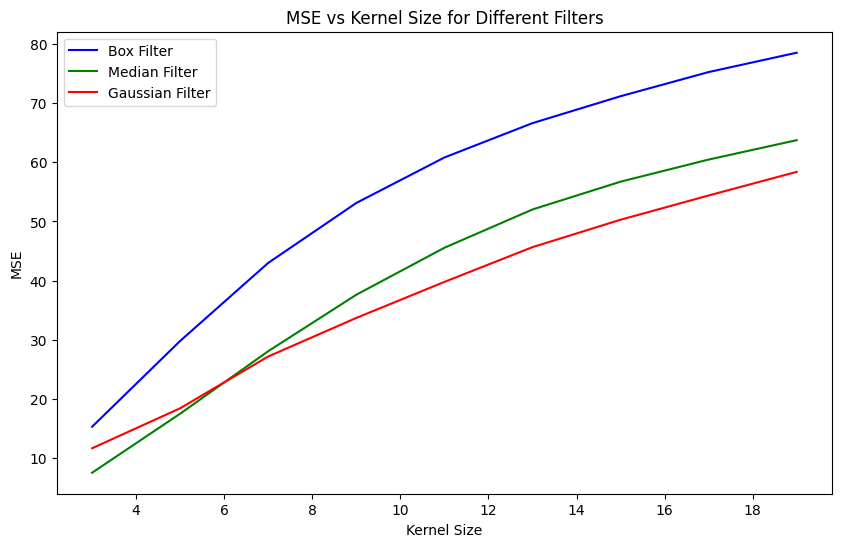

In [13]:
from sklearn.metrics import mean_squared_error

# Define the kernel sizes to test
kernel_sizes = [(2*i + 1, 2*i + 1) for i in range(1, 10)]

# Initialize dictionaries to store MSE values
mse_gaussian = []
mse_box = []
mse_median = []

# Calculate MSE for each kernel size
for kernel_size in kernel_sizes:
    # Apply filters
    box_filtered = cv2.boxFilter(image, -1, kernel_size)
    median_filtered = cv2.medianBlur(image, kernel_size[0])
    gaussian_filtered = cv2.GaussianBlur(image, kernel_size, 0)
    
    # Calculate MSE
    mse_box.append(mean_squared_error(image.flatten(), box_filtered.flatten()))
    mse_median.append(mean_squared_error(image.flatten(), median_filtered.flatten()))
    mse_gaussian.append(mean_squared_error(image.flatten(), gaussian_filtered.flatten()))

# Plot the MSE vs kernel size
plt.figure(figsize=(10, 6))
plt.plot([ks[0] for ks in kernel_sizes], mse_box, label='Box Filter', color='blue')
plt.plot([ks[0] for ks in kernel_sizes], mse_median, label='Median Filter', color='green')
plt.plot([ks[0] for ks in kernel_sizes], mse_gaussian, label='Gaussian Filter', color='red')
plt.xlabel('Kernel Size')
plt.ylabel('MSE')
plt.title('MSE vs Kernel Size for Different Filters')
plt.legend()
plt.show()